In [63]:

#from bs4 import BeautifulSoup

import pandas as pd
#from lxml import etree
import requests
import json
from pprint import pp

In [64]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

use read json to get the json into a data frame. try and play around with different info you 
can manipulate with the Data frame

Some ideas:

1. Plot all of the starships with a crew over 500 
2. Plot all of the starships with a crew over 500 and hyperdrive rating of 2
3. Put the name of the starship as the index column
4. Plot the price of each starship in relation to the cargo capacity
5. Plot the total number of charachters for each eye color 
6. Plot the height for each charachters

In [65]:
url='https://swapi.dev/api/starships/?page=1'
resposne=requests.get(url)
r=resposne.json()

In [66]:
total_pages=4
url='https://swapi.dev/api/starships/?page='
data=[]
for i in range(1,total_pages+1):
    resposne=requests.get(url+str(i))
    r=resposne.json()
    data.append(r)
pp(data)

[{'count': 36,
  'next': 'https://swapi.dev/api/starships/?page=2',
  'previous': None,
  'results': [{'name': 'CR90 corvette',
               'model': 'CR90 corvette',
               'manufacturer': 'Corellian Engineering Corporation',
               'cost_in_credits': '3500000',
               'length': '150',
               'max_atmosphering_speed': '950',
               'crew': '30-165',
               'passengers': '600',
               'cargo_capacity': '3000000',
               'consumables': '1 year',
               'hyperdrive_rating': '2.0',
               'MGLT': '60',
               'starship_class': 'corvette',
               'pilots': [],
               'films': ['https://swapi.dev/api/films/1/',
                         'https://swapi.dev/api/films/3/',
                         'https://swapi.dev/api/films/6/'],
               'created': '2014-12-10T14:20:33.369000Z',
               'edited': '2014-12-20T21:23:49.867000Z',
               'url': 'https://swapi.dev/api/sta

In [67]:
cleaned_dt=[]
for result in data:
    for data in result['results']:
        cleaned_dt.append(data)
pp(cleaned_dt)

[{'name': 'CR90 corvette',
  'model': 'CR90 corvette',
  'manufacturer': 'Corellian Engineering Corporation',
  'cost_in_credits': '3500000',
  'length': '150',
  'max_atmosphering_speed': '950',
  'crew': '30-165',
  'passengers': '600',
  'cargo_capacity': '3000000',
  'consumables': '1 year',
  'hyperdrive_rating': '2.0',
  'MGLT': '60',
  'starship_class': 'corvette',
  'pilots': [],
  'films': ['https://swapi.dev/api/films/1/',
            'https://swapi.dev/api/films/3/',
            'https://swapi.dev/api/films/6/'],
  'created': '2014-12-10T14:20:33.369000Z',
  'edited': '2014-12-20T21:23:49.867000Z',
  'url': 'https://swapi.dev/api/starships/2/'},
 {'name': 'Star Destroyer',
  'model': 'Imperial I-class Star Destroyer',
  'manufacturer': 'Kuat Drive Yards',
  'cost_in_credits': '150000000',
  'length': '1,600',
  'max_atmosphering_speed': '975',
  'crew': '47,060',
  'passengers': 'n/a',
  'cargo_capacity': '36000000',
  'consumables': '2 years',
  'hyperdrive_rating': '2.0',


In [68]:
df1=pd.DataFrame.from_dict(cleaned_dt)

In [69]:
df1.shape

(36, 18)

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    36 non-null     object
 1   model                   36 non-null     object
 2   manufacturer            36 non-null     object
 3   cost_in_credits         36 non-null     object
 4   length                  36 non-null     object
 5   max_atmosphering_speed  36 non-null     object
 6   crew                    36 non-null     object
 7   passengers              36 non-null     object
 8   cargo_capacity          36 non-null     object
 9   consumables             36 non-null     object
 10  hyperdrive_rating       36 non-null     object
 11  MGLT                    36 non-null     object
 12  starship_class          36 non-null     object
 13  pilots                  36 non-null     object
 14  films                   36 non-null     object
 15  created 

In [71]:
df1.describe()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
count,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
unique,36,36,27,26,36,21,20,20,26,17,12,13,26,15,12,36,36,36
top,CR90 corvette,CR90 corvette,Kuat Systems Engineering,unknown,150,1050,1,0,unknown,2 years,1.0,unknown,Starfighter,[],[https://swapi.dev/api/films/6/],2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
freq,1,1,4,10,1,5,11,11,7,6,15,19,5,21,9,1,1,1


use read json to get the json into a data frame. try and play around with different info you 
can manipulate with the Data frame

Some ideas:

1. Plot all of the starships with a crew over 500 
2. Plot all of the starships with a crew over 500 and hyperdrive rating of 2
3. Put the name of the starship as the index column
4. Plot the price of each starship in relation to the cargo capacity
5. Plot the total number of charachters for each eye color 
6. Plot the height for each charachters

 Plot the price of each starship in relation to the cargo capacity

df1['cost_in_credits'].map(int)

In [72]:
df1['cost_in_credits']

0           3500000
1         150000000
2            240000
3     1000000000000
4            100000
5            134999
6            149999
7           unknown
8        1143350000
9           unknown
10          unknown
11           240000
12          8500000
13        104000000
14           175000
15           220000
16          unknown
17          unknown
18           200000
19          unknown
20         55000000
21          2000000
22          unknown
23           180000
24          unknown
25          unknown
26            35700
27        125000000
28          1000000
29         59000000
30          unknown
31           320000
32           155000
33         57000000
34           168000
35           102500
Name: cost_in_credits, dtype: object

In [77]:
df_cost_capacity=df1[(df1['cost_in_credits']!='unknown') & (df1['cargo_capacity']!='unknown')]
#df1 = df[(df['A'] != 'unknown') & (df['B'] > '2017-01-02')]
df_cc=df_cost_capacity[['cost_in_credits','cargo_capacity']]

In [78]:
df_cc

,cost_in_credits,cargo_capacity
0,3500000,3000000
1,150000000,36000000
2,240000,180000
3,1000000000000,1000000000000
4,100000,100000
5,134999,110
6,149999,110
8,1143350000,250000000
11,240000,80000
12,8500000,6000000


In [79]:
df_cc['cost_in_credits'].map(int)

0           3500000
1         150000000
2            240000
3     1000000000000
4            100000
5            134999
6            149999
8        1143350000
11           240000
12          8500000
14           175000
15           220000
18           200000
20         55000000
23           180000
26            35700
27        125000000
28          1000000
29         59000000
31           320000
32           155000
33         57000000
34           168000
35           102500
Name: cost_in_credits, dtype: int64

In [80]:
df_cc['cargo_capacity'].map(int)

0           3000000
1          36000000
2            180000
3     1000000000000
4            100000
5               110
6               110
8         250000000
11            80000
12          6000000
14               40
15               45
18               65
20          2500000
23               60
26              240
27         50000000
28            50000
29         20000000
31               60
32              110
33         40000000
34              140
35               60
Name: cargo_capacity, dtype: int64

In [76]:

#df_cost_capacity['cargo_capacity','cost_in_credits'].plot.line()

# plt.title('model vs crew')
# plt.ylabel('Crew')
# plt.xlabel('Model')
# plt.show()

KeyError: ('cargo_capacity', 'cost_in_credits')

Plot all of the starships with a crew over 500

In [ ]:
df1['crew']
df1['crew']=df1['crew'].str.replace(',','')




In [ ]:
df1['crew']

0      30-165
1       47060
2           5
3      342953
4           4
5           2
6           1
7           1
8      279144
9           6
10          1
11          6
12        854
13       5400
14          1
15          1
16          9
17        175
18          1
19          8
20          1
21          5
22    unknown
23          1
24          4
25        700
26          3
27        600
28          5
29       7400
30          3
31          1
32          3
33        200
34          1
35          1
Name: crew, dtype: object

In [ ]:
df_new=df1['crew'].str.replace(",","")
df_new=[i.split("-")[-1] for i in df_new]
df_new

In [ ]:
df1['crew']=df1['crew'].str.split("-")[-1]
#df1['crew']=df1['crew'].str.strip('-',df1['crew'].str.split("-")[0][1])
#30-165  165
# import re
# pattern='[^-]*$'
# match=re.findall(pattern,df1['crew'])




# ch=
# match=re.findall(pattern,df1['crew'])
# if match:
#      df1['crew'].pattern
# else:


KeyError: -1

In [ ]:
df1['crew']

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
Name: crew, dtype: int64

In [ ]:
crew_over=(df1['crew'].map(float))>500

ValueError: could not convert string to float: 'unknown'

In [ ]:
df_crew_mod=df1[['crew_over','model']]

In [ ]:
df_crew_mod.plot(marker='o')

plt.title('model vs crew')
plt.ylabel('Crew')
plt.xlabel('Model')
plt.show()

3. Put the name of the starship as the index column

In [ ]:
df1.set_index('model',inplace=True)
df1


5. Plot the total number of charachters for each eye color 

Plot the height for each charachters

In [ ]:
df1['length']=df1['length'].str.replace(',', '')
df1['length']

model
CR90 corvette                                  150
Imperial I-class Star Destroyer               1600
Sentinel-class landing craft                    38
DS-1 Orbital Battle Station                 120000
YT-1300 light freighter                      34.37
BTL Y-wing                                      14
T-65 X-wing                                   12.5
Twin Ion Engine Advanced x1                    9.2
Executor-class star dreadnought              19000
GR-75 medium transport                          90
Firespray-31-class patrol and attack          21.5
Lambda-class T-4a shuttle                       20
EF76 Nebulon-B escort frigate                  300
MC80 Liberty type Star Cruiser                1200
RZ-1 A-wing Interceptor                        9.6
A/SF-01 B-wing starfighter                    16.9
Consular-class cruiser                         115
Lucrehulk-class Droid Control Ship            3170
N-1 starfighter                                 11
J-type 327 Nubian royal s

In [ ]:
df1['length']=df1['length'].map(float)

<AxesSubplot: xlabel='model'>

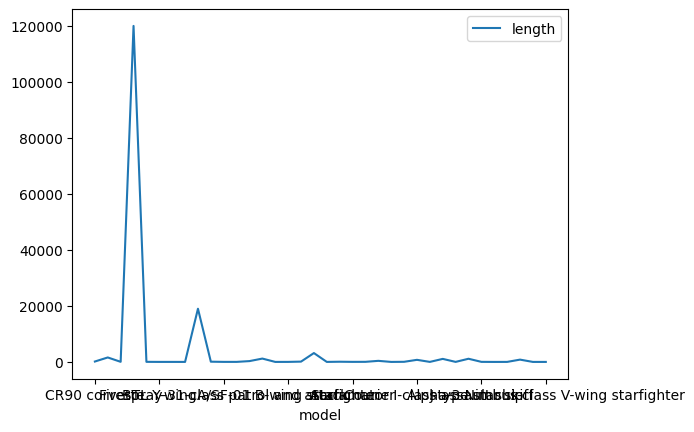

In [ ]:
df1[['name','length']].plot.line()